In [2]:
import sys
sys.path.append('/home/547/bxb547/ga-repository/agdc_statistics')
LON="--lon_range '(130.802, 130.90205)'"
LAT="--lat_range '(-12.41, -12.5113)'"
YEAR="--year_range 2000-2016"  # requirement mandatory
EPOCH="--epoch 5" #default epoch 2
PER="--per 25"  #Default percentage 10
DEB="--debug"

%run tidal_range.py $LON $LAT $YEAR $PER $EPOCH $DEB


Input date range 2000-2016
running task for epoch 2000-01-01 TO 2004-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205)(-12.41, -12.5113) epoch 5
 doing for sensor ls5_nbar_albers
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
reading from tidal model file and using Haversine algorithm to extract shortest distance
Found tide post coordinates,depth and shortest distance ('130.87', '-12.24', '-816', 24.612725464254066)
received from predict tides  2017-01-31 10:15:33.692387
lowest tides range and number -2.365,-1.155 27
highest tides range and number 1.269,2.48 36
lowest tides list  [['2004-01-21', -2.365], ['2004-01-21', -2.36], ['2000-02-19', -2.076], ['2000-02-19', -2.07], ['2004-01-05', -1.967], ['2004-01-05', -1.965], ['2000-01-18', -1.931], ['2000-01-18', -1.929], ['2000-02-03', -1.909], ['2000-02-03', -1.906], ['2003-12-20', -1.839], ['2001-02-05', -1.794], ['2002-02-24', -1.687], ['2002-02-24',

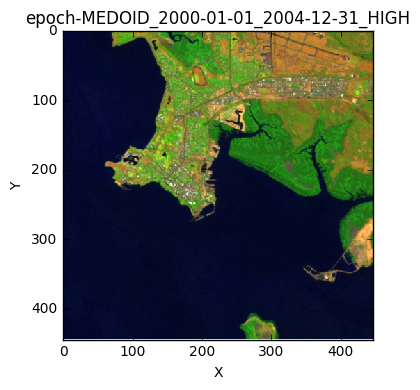

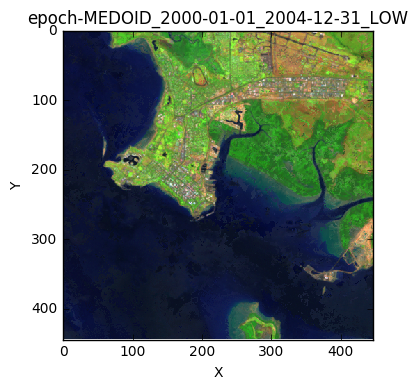

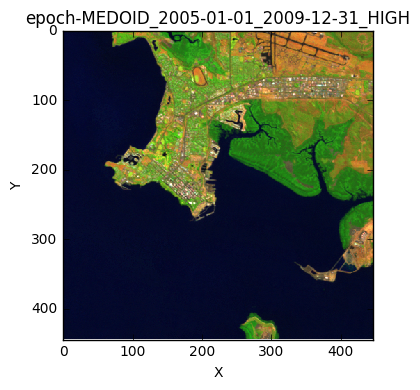

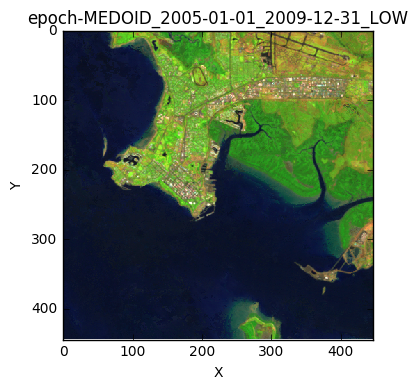

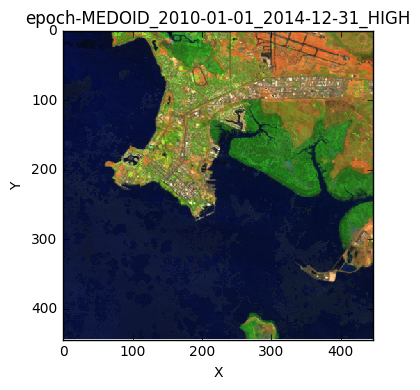

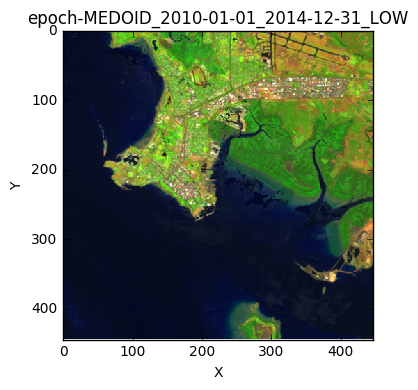

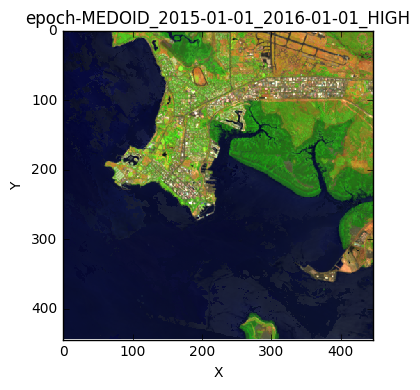

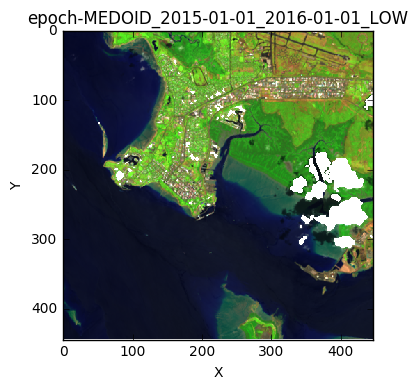

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fake_saturation = 4500
for k in sorted(MY_DATA.iterkeys()):
    Z = MY_DATA[k].to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color')
    clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    max_val = clipped_visible.max(['y', 'x'])
    scaled = (clipped_visible / max_val)
    im = plt.imshow(scaled, interpolation='nearest')
    plt.title('epoch-'+k)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    #plt.xlim(100, 300)
    plt.show()


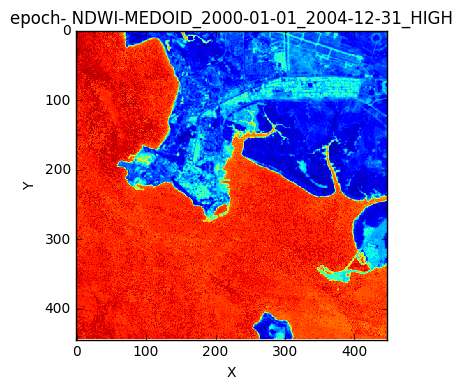

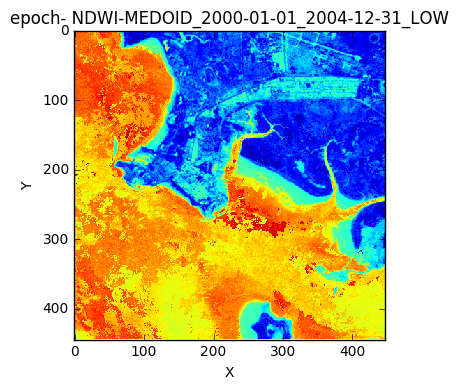

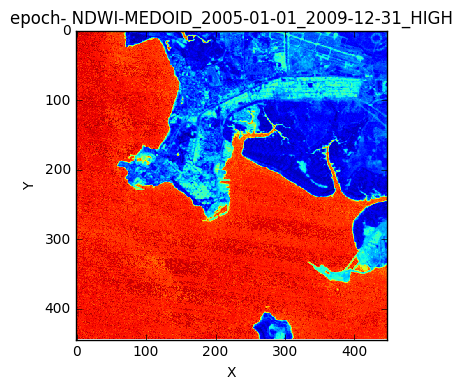

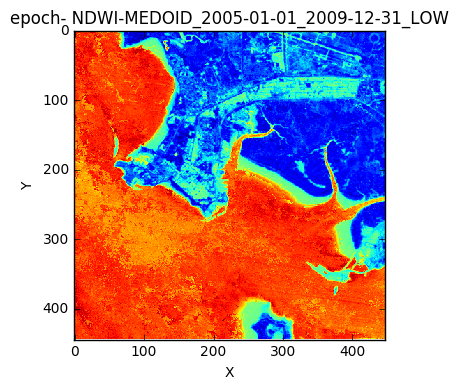

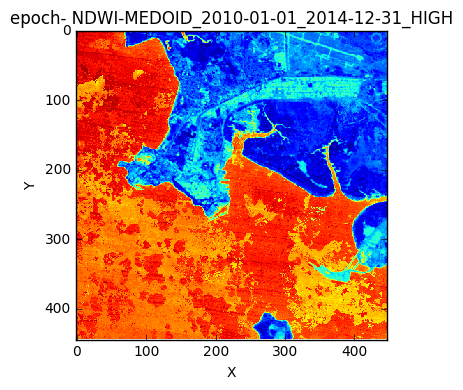

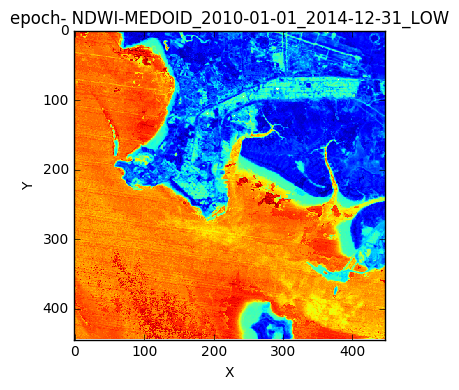

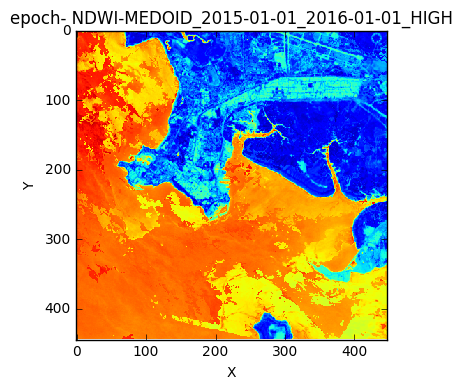

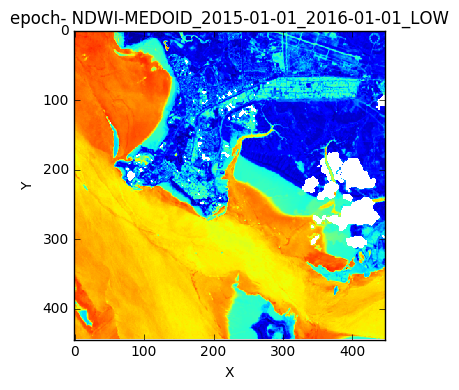

In [5]:
fake_saturation = 4500
for k in sorted(MY_DATA.iterkeys()):
    green = MY_DATA[k].green
    nir = MY_DATA[k].nir
    ndwi = (green-nir)/(green+nir)
    im = plt.imshow(ndwi, interpolation='nearest')
    plt.title('epoch- NDWI-'+k)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    #plt.xlim(100, 300)
    plt.show()

In [10]:
LON="--lon_range '(130.802, 130.90205)'"
LAT="--lat_range '(-12.41, -12.5113)'"
YEAR="--year_range 2000-2016"  # requirement mandatory
EPOCH="--epoch 5" #default epoch 2
PER="--per 25"  #Default percentage 10
STATS="--stats NDWI"  #Default is medoid otherwise stats as per user requirement
DEB="--debug"   # To get detail of date/time and tide heights
# LS7FL="--ls7fl"  To include LS7 datasets

%run tidal_range.py $LON $LAT $YEAR $PER $EPOCH $STATS $DEB


Input date range 2000-2016
running task for epoch 2000-01-01 TO 2004-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205)(-12.41, -12.5113) epoch 5
 doing for sensor ls5_nbar_albers
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
reading from tidal model file and using Haversine algorithm to extract shortest distance
Found tide post coordinates,depth and shortest distance ('130.87', '-12.24', '-816', 24.612725464254066)
received from predict tides  2017-01-31 11:03:04.172293
lowest tides range and number -2.365,-1.155 27
highest tides range and number 1.269,2.48 36
lowest tides list  [['2004-01-21', -2.365], ['2004-01-21', -2.36], ['2000-02-19', -2.076], ['2000-02-19', -2.07], ['2004-01-05', -1.967], ['2004-01-05', -1.965], ['2000-01-18', -1.931], ['2000-01-18', -1.929], ['2000-02-03', -1.909], ['2000-02-03', -1.906], ['2003-12-20', -1.839], ['2001-02-05', -1.794], ['2002-02-24', -1.687], ['2002-02-24',

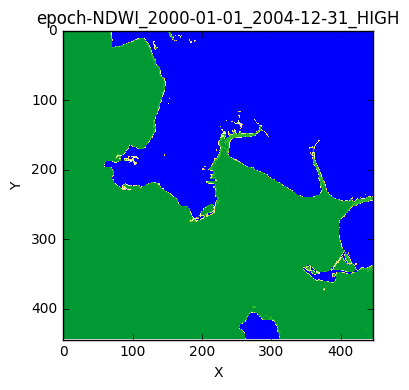

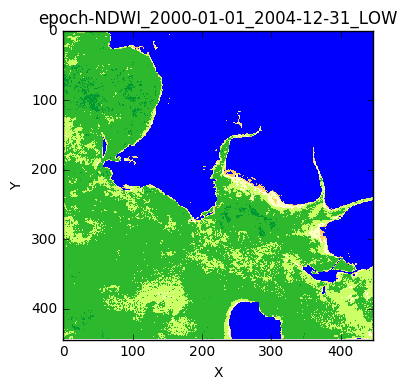

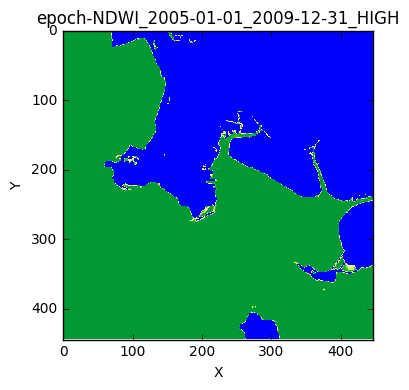

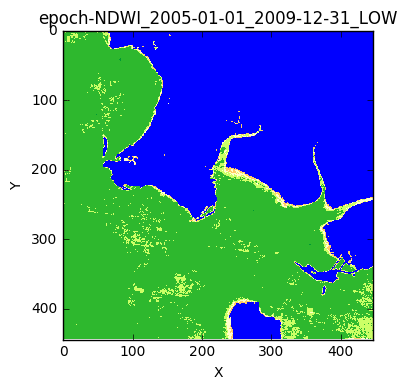

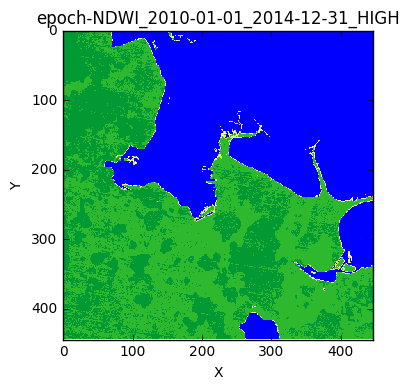

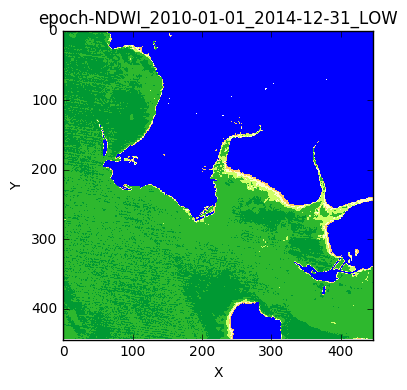

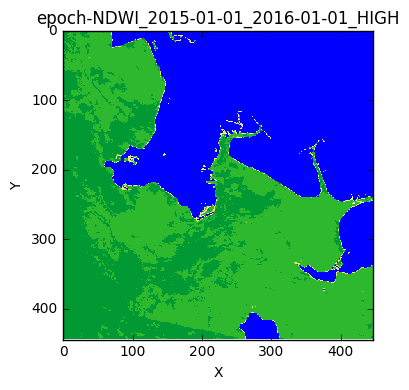

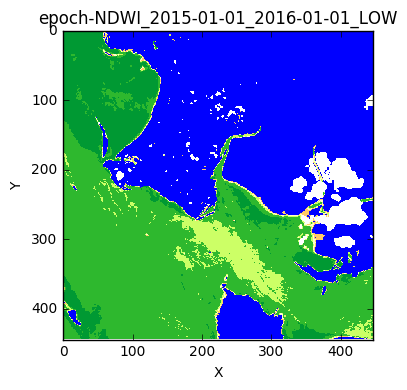

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

# cmap = cm.RdYlGn_r
cmap = cm.colors.ListedColormap(['b', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
bounds = [-1, 0, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
norm = cm.colors.BoundaryNorm(bounds, cmap.N)

fake_saturation = 4500
for k in sorted(MY_DATA.iterkeys()):
    Z = MY_DATA[k]
    # print Z
    im = plt.imshow(Z, cmap=cmap, interpolation='nearest', norm=norm)
    plt.title('epoch-'+k)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.show()

Input date range 2000-2016
running task for epoch 2000-01-01 TO 2004-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205)(-12.41, -12.5113) epoch 5
 doing for sensor ls5_nbar_albers
 doing for sensor ls7_nbar_albers
 epoch end date is reset for LS7 2003/03/01
 doing for sensor ls8_nbar_albers
reading from tidal model file and using Haversine algorithm to extract shortest distance
Found tide post coordinates,depth and shortest distance ('130.87', '-12.24', '-816', 24.612725464254066)
received from predict tides  2017-01-31 11:07:36.323445
lowest tides range and number -2.365,-1.155 27
highest tides range and number 1.269,2.48 36
 loaded nbar data with low 11:07:36.518642
creating median image for NDBI for lower range 11:07:36.526675
creating median image for NDBI for higher range 11:07:36.625421
calculation for NDBI finished for this epoch 11:07:36.827238
running task for epoch 2005-01-01 TO 2009-12-31 on percentile 25 tide post  for lon/lat range (130.802, 130.90205

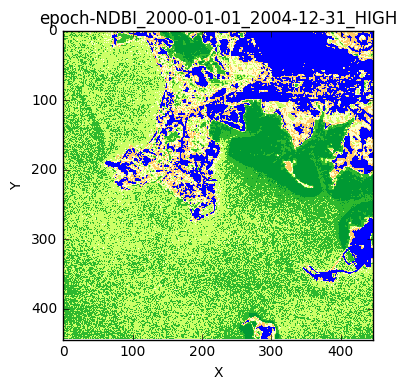

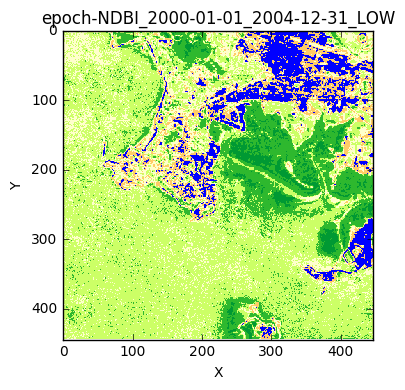

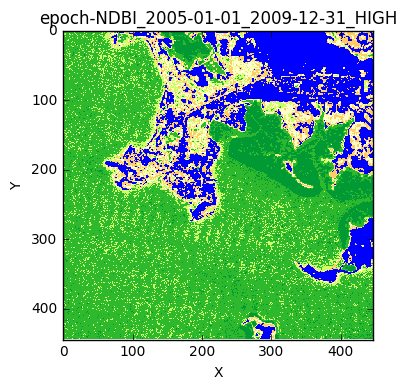

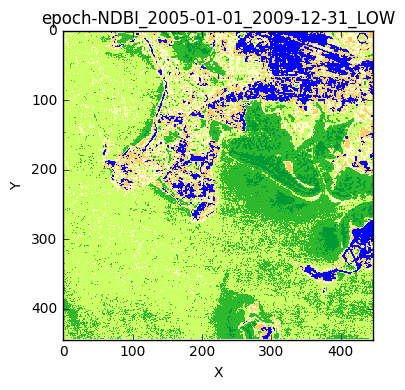

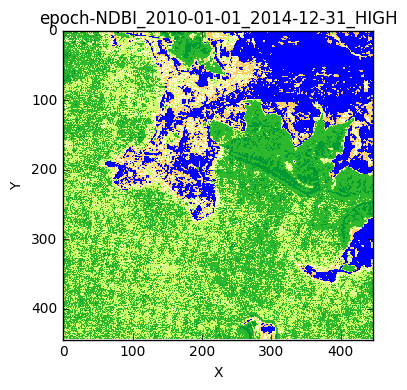

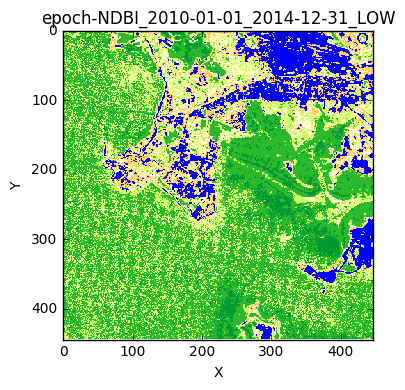

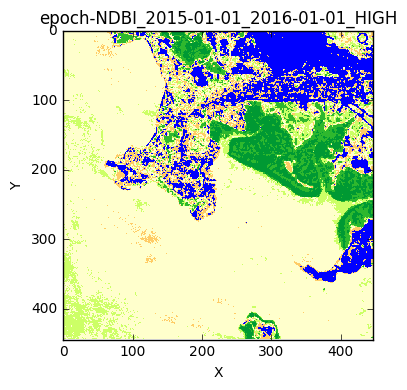

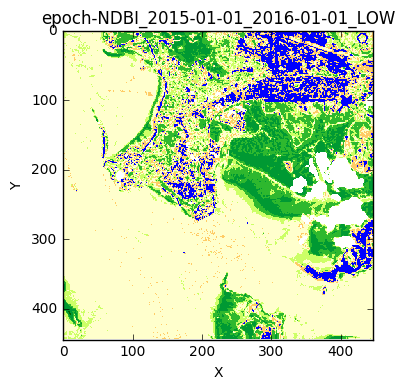

In [13]:
STATS="--stats NDBI"

%run tidal_range.py $LON $LAT $YEAR $PER $EPOCH $STATS
for k in sorted(MY_DATA.iterkeys()):
   
    Z = MY_DATA[k]
    # clipped_visible = Z.where(Z<fake_saturation).fillna(fake_saturation)
    # max_val = clipped_visible.max(['y', 'x'])
    # scaled = (clipped_visible / max_val)
    im = plt.imshow(Z, cmap=cmap, interpolation='nearest', norm=norm)
    plt.title('epoch-'+k)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    #plt.xlim(100, 300)
    plt.show()